In [187]:
import cv2
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn import cluster
import matplotlib.patches as patches
import copy

In [43]:
os.getcwd()

'/Users/lanyuan/Documents/project3'

In [214]:
import os
filename = []
gtfilename = []
image_path = './Dataset/'
save_path ='./Data/'
path="/Users/lanyuan/Documents/project3/Data/6-box.npz"
one=np.load(path)
data = one["data"]; box = one["box"]

files= os.listdir(image_path)
for file in files:
    if file.find('gt') == -1:      
        filename.append(file)
print(filename)    

for gtfile in files:
        if gtfile.find('gt') != -1:      
        gtfilename.append(gtfile)
print(gtfilename) 
#filenamee = '33.bmp'
#file_path = os.path.join(image_path, filenamee)

IndentationError: expected an indented block (<ipython-input-214-917adc018608>, line 18)

In [336]:


def get_Crops_sqa(img, data, box):
    SquareBoxSize = np.maximum(  np.array(box)[:,0],np.array(box)[:,1] )
    crops = []
    for i in range( len(data) ):
        x = data[i][0] 
        y = data[i][1]
        h = SquareBoxSize[i]

        


        h= int( np.min ( [img.shape[1] - x, x, img.shape[0] - y,  y,  h ] ) )
 
        #print(  x - h/2 )
        x_start = int( x - h/2 )
        y_start = int( y - h/2 )
        x_end = int( x + h/2 )
        y_end = int( y + h/2 )

        #print(x_start, x_end)

        crop_p = img[   y_start:y_end, x_start:x_end ]
        #print(crop_p.shape)
        crop_p = cv2.resize(crop_p, (224, 224), interpolation=cv2.INTER_CUBIC)

        crops.append( crop_p)
        
    crops = np.array( crops )
    return crops
def get_Crops(img, data, box):
    #SquareBoxSize = np.maximum(  np.array(box)[:,0],np.array(box)[:,1] )
    crops = []
    for i in range( len(data) ):
        x = data[i][0] 
        y = data[i][1]
        #h = SquareBoxSize[i]
        w = box[i][0]
        h = box[i][1]
        
        


        #h= int( np.min ( [img.shape[1] - x, x, img.shape[0] - y,  y,  h ] ) )
 
        #print(  x - h/2 )
        x_start = int( x - w/2 )
        y_start = int( y - h/2 )
        x_end = int( x + w/2 )
        y_end = int( y + h/2 )

        #print(x_start, x_end)

        crop_p = img[   y_start:y_end, x_start:x_end ]
        #print(crop_p.shape)
        crop_p = cv2.resize(crop_p, (224, 224), interpolation=cv2.INTER_CUBIC)

        crops.append( crop_p)
        
    crops = np.array( crops )
    return crops
def gt_Crops(gt, img ,data, box):
    gt_crops = []
    uniq_gt = []
    for i in range( len(data) ):
        x = data[i][0] 
        y = data[i][1]
        w = box[i][0]
        h = box[i][1]


        #h= int( np.min ( [img.shape[1] - x, x, img.shape[0] - y,  y,  h ] ) )


        x_start = int( x - w/2 )
        y_start = int( y - h/2 )
        x_end = int( x + w/2 )
        y_end = int( y + h/2 )

        #print(x_start, x_end)

        gt_crop_p = gt[   y_start:y_end, x_start:x_end ]
        img_crop_p = img[   y_start:y_end, x_start:x_end ]
        #print(img_crop_p.shape)
        #print(crop_p.shape)
        #crop_p = cv2.resize(crop_p, (224, 224), interpolation=cv2.INTER_CUBIC)
        
        
        uniq_ = np.unique(gt_crop_p)
        if len(uniq_) == 1:
            label = 0
            num = np.sum( gt_crop_p == 0 ) 
        else:
            numbers = []
            for lab in uniq_:
                numbers.append( np.sum( img_crop_p == lab ) )

            amax = np.argmax( numbers[1:]  ) +1
            label = uniq_[ amax ]
            num = numbers[amax]
            
            
        
        
        uniq_gt.append([label, num])
        gt_crops.append( gt_crop_p)
    gt_crops = np.array( gt_crops )
    uniq_gt = np.array(uniq_gt)
    
    return gt_crops,uniq_gt
def gt_Crops_sqa(gt, img ,data, box):
    SquareBoxSize = np.maximum(  np.array(box)[:,0],np.array(box)[:,1] )
    gt_crops = []
    uniq_gt = []
    for i in range( len(data) ):
        x = data[i][0] 
        y = data[i][1]
        h = SquareBoxSize[i]


        h= int( np.min ( [img.shape[1] - x, x, img.shape[0] - y,  y,  h ] ) )


        x_start = int( x - h/2 )
        y_start = int( y - h/2 )
        x_end = int( x + h/2 )
        y_end = int( y + h/2 )

        #print(x_start, x_end)

        gt_crop_p = gt[   y_start:y_end, x_start:x_end ]
        img_crop_p = img[   y_start:y_end, x_start:x_end ]
        #print(img_crop_p.shape)
        #print(crop_p.shape)
        #crop_p = cv2.resize(crop_p, (224, 224), interpolation=cv2.INTER_CUBIC)
        
        
        uniq_ = np.unique(gt_crop_p)
        if len(uniq_) == 1:
            label = 0
            num = np.sum( gt_crop_p == 0 ) 
        else:
            numbers = []
            for lab in uniq_:
                numbers.append( np.sum( img_crop_p == lab ) )

            amax = np.argmax( numbers[1:]  ) +1
            label = uniq_[ amax ]
            num = numbers[amax]
            
            
        
        
        uniq_gt.append([label, num])
        gt_crops.append( gt_crop_p)
    gt_crops = np.array( gt_crops )
    uniq_gt = np.array(uniq_gt)
    
    return gt_crops,uniq_gt
def py_cpu_nms(data, box, scores, thresh):  
    
    dets = np.concatenate( (data - box/2, data + box/2), axis = 1 )
    """Pure Python NMS baseline."""  
    x1 = dets[:, 0]  
    y1 = dets[:, 1]  
    x2 = dets[:, 2]  
    y2 = dets[:, 3]  
    #scores = dets[:, 4]  #bbox打分
  
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)  
#打分从大到小排列，取index  
    order = scores.argsort()[::-1]  
#keep为最后保留的边框  
    keep = []  
    while order.size > 0:  
#order[0]是当前分数最大的窗口，肯定保留  
        i = order[0]  
        keep.append(i)  
#计算窗口i与其他所有窗口的交叠部分的面积
        xx1 = np.maximum(x1[i], x1[order[1:]])  
        yy1 = np.maximum(y1[i], y1[order[1:]])  
        xx2 = np.minimum(x2[i], x2[order[1:]])  
        yy2 = np.minimum(y2[i], y2[order[1:]])  
  
        w = np.maximum(0.0, xx2 - xx1 + 1)  
        h = np.maximum(0.0, yy2 - yy1 + 1)  
        inter = w * h  
#交/并得到iou值  
        ovr = inter / (areas[i] + areas[order[1:]] - inter)  
#inds为所有与窗口i的iou值小于threshold值的窗口的index，其他窗口此次都被窗口i吸收  
        inds = np.where(ovr <= thresh)[0]  
#order里面只保留与窗口i交叠面积小于threshold的那些窗口，由于ovr长度比order长度少1(不包含i)，所以inds+1对应到保留的窗口
        order = order[inds + 1]  
  
    return np.array(keep)


def mergebox(data, box, label):
    
    newdata = []
    newbox = []
    newlabel = []
    
    labels = np.unique(label[:,0])
    for lab in labels:
        if lab >= 0:
            boolbox = ( label[ : , 0] == lab)
            subbox = box[boolbox]
        
            subdata = data[boolbox]
            sublabel = label[boolbox]

            dets = py_cpu_nms( subdata,  subbox, sublabel[:, 1],  0.1)

            if len(newdata) == 0:
                newdata = subdata[ dets ]
                newbox = subbox[ dets ]
                newlabel =  sublabel[ dets ]
            else:
                newdata = np.concatenate( (newdata, subdata[ dets ] ) ,axis = 0)
                newbox = np.concatenate( (newbox, subbox[ dets ] ) ,axis = 0)
                newlabel = np.concatenate( (newlabel, sublabel[ dets ] ) ,axis = 0)
            
    return newdata, newbox, newlabel
        
def mergebox_all(data, box, label):
    
    labels = np.unique(label[:,0])
    
    label_fixed = copy.deepcopy(label).astype(float)
    
    newdata = []
    newbox = []
    newlabel =  []
    
    for lab in labels:
        boxbool = label[:,0] == lab
        score =  np.tanh( ( label[boxbool][:, 1] - np.average( label[boxbool][:, 1] )  )/ (1+6*np.std( label[boxbool][:, 1] ) )  ) +2* lab
        sublab = label[boxbool][:, 0] 
        sublabel = np.stack( (sublab, score) ).transpose()
        label_fixed[boxbool] = sublabel 
        
   
    dets = py_cpu_nms( data,  box,  label_fixed[:, 1],  0.1)
    newdata = data[ dets ]
    newbox = box[ dets ]
    newlabel =  label[ dets ]
    return newdata, newbox, newlabel



In [340]:
def prepossing_img(img, gt, save_path, save_file_name, train = True):
    
    filename = os.path.join(save_path, save_file_name)
    
    if os.path.exists(filename):
        preinfo = np.load(filename)
        mdata = preinfo["data"]
        mbox = preinfo["box"]
        mlabel = preinfo[ 'labels']
        crops = get_Crops(img,mdata,mbox)
        return mdata, mbox, mlabel, crops
        
    else:
        #fileinfo = re.split(r"[-,.]",file)
        #filenum = fileinfo[-2]
        #file_path = os.path.join(image_path, file)
        #img = cv2.imread(file_path,1)
        data = []
        bbox = []

        ret,thresh1=cv2.threshold(img,50,255,cv2.THRESH_BINARY)

        kernel = np.ones((3,3),np.uint8)  
        dilation = cv2.dilate(thresh1,kernel,iterations =2)

        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
        edge = cv2.Canny(dilation, 125, 255) 

        gray = cv2.cvtColor(dilation, cv2.COLOR_BGR2GRAY)
        imge,contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for i in contours:

            x,y,w,h=cv2.boundingRect(i)

            #print( img[x: x + w, y:+w] )

            data.append([x+w/2,y+h/2])

            X = img.shape[1]
            Y = img.shape[0]
            
            w = max(w, 20)
            h = max(h, 20)
            

            w = min( 2*w, X - x, x )
            h = min( 2*h, Y-y, y )



            bbox.append([w,h])
            
        data = np.array(data)
        bbox = np.array(bbox)
            
        
        #gt = cv2.imread(os.path.join(image_path, gtfile),1)
        
        if  train:
            gt_crops,label = gt_Crops(gt,img,data,bbox)
        else:
            gt_crops,label = gt_Crops( np.zeros_like(img) ,img,data,bbox)
        
        #mdata, mbox, mlabel = mergebox(data, bbox, label)
        mdata, mbox, mlabel = mergebox_all(data, bbox, label)

        crops = get_Crops(img,mdata,mbox)

        np.savez(filename, data=mdata, box=mbox, labels = mlabel)

    return mdata, mbox, mlabel, crops


    
    
    
    

In [341]:
image_path = './Dataset/'
save_path ='./Data/'

In [342]:
def plotImg_box( img, data, bbox, label ):
    plt.rcParams['figure.figsize'] = (40,20)

    fig,ax = plt.subplots(1)

    ax.imshow(img)
    markers = data
    x, y = zip(*markers)


    for i, lab in enumerate( label ):
        if lab[0] > 0:
            xb, yb = data[i]
            w,h = bbox[i]

            rect = patches.Rectangle(( int(xb-w/2) , int(yb-h/2) ),w,h,linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
    ax.plot(x, y, '.')
    plt.show()
def plot_crops(label ,crops):
    plt.rcParams['figure.figsize'] = (10,10)

    index = np.random.choice(  len( crop ) , 12 )

    for i, ind in enumerate(index):

        ax = plt.subplot(3,4,i+1)
        ax.imshow(crops[ind])
        ax.set_title( label[ind, 0] )


    plt.tight_layout()
    plt.show()
def Crop_Train(image_path, filename, gtfilename, save_path):
    

    
    file_path = os.path.join(image_path, filename)
    gtfile_path =  os.path.join(image_path, gtfilename)
    img = cv2.imread(file_path,1)
    gt = cv2.imread(gtfile_path,1)
    save_file_name = str(filename.split(".")[0]) +'-box'+".npz"
    

    return img, gt, prepossing_img( img, gt , save_path, save_file_name)
    #path="/Users/lanyuan/Documents/project3/Data/6-box.npz"
    #one=np.load(path)
    #data = one["data"]; box = one["box"]

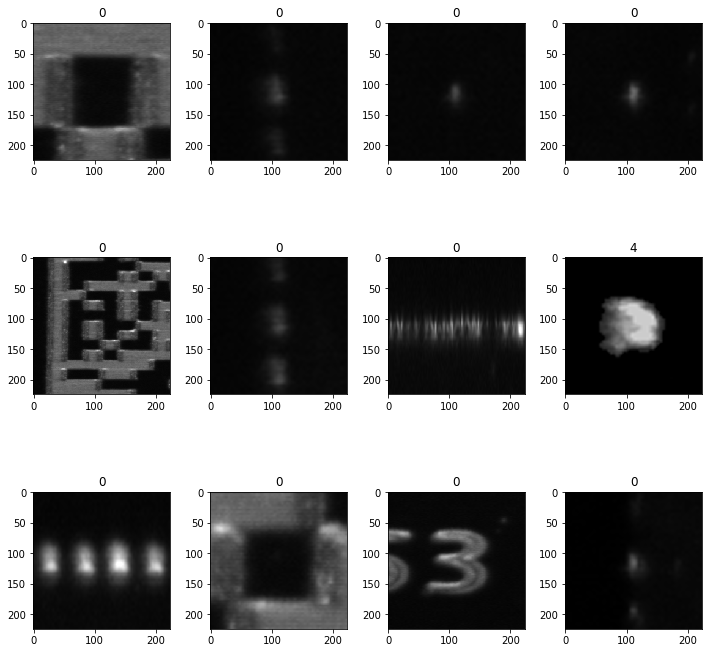

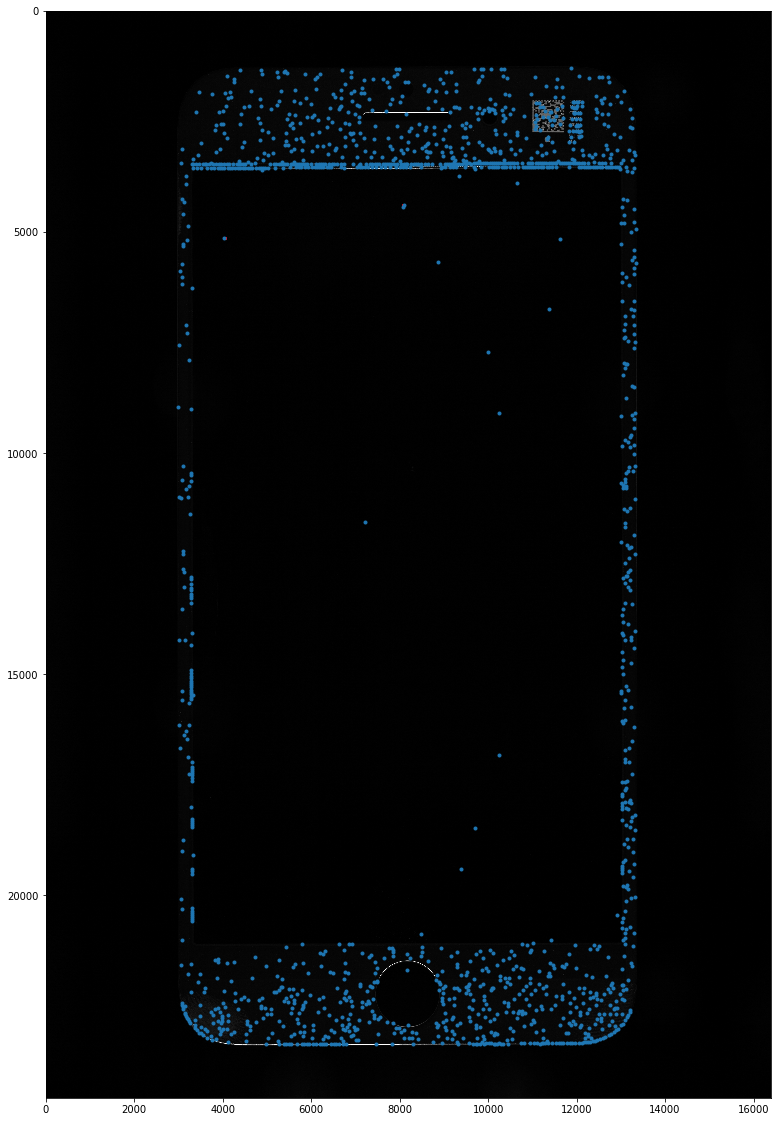

In [357]:
img, gt, preinfo = Crop_Train(image_path, '4957_10009-5137_4040-4398_8101-6.bmp',"gt-4957_10009-5137_4040-4398_8101-6.bmp", save_path)
data, bbox, label, crops = preinfo
plot_crops(label ,crops)
plotImg_box(img, data,bbox, label)

In [ ]:
xc = 4398; yc = 8101
plt.rcParams['figure.figsize'] = (10,10)
size = 50
plt.imshow( img[xc -size:xc+size,yc-size:yc+size] )
plt.show()
plt.imshow( dilation [xc -size:xc+size,yc-size:yc+size] )
plt.show()
plt.matshow( gt[xc -size:xc+size,yc-size:yc+size,0] )
plt.show()

In [274]:
prepossing_img(image_path,'4957_10009-5137_4040-4398_8101-6.bmp', save_path)

In [83]:
for file in filename:
    prepossing_img(image_path,file, save_path)
print('preprocessing is done')
    

NameError: name 'filename' is not defined

In [ ]:
# In[14]:


data=np.array(data)
print(data.shape)
labels = range(1, 142)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(data[:,0],data[:,1], label='True Position')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

In [ ]:
# In[15]:


from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import time
start = time.time()
linked = linkage(data, 'average')
labelList = range(1, np.array(data).shape[0]+1)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  
c, coph_dists = cophenet(linked, pdist(data))
print (c)
# print(linked[0])
print('end',time.time()-start)

In [ ]:
# In[16]:



from scipy.cluster.hierarchy import fcluster
max_d = 3000
clusters = fcluster(linked, max_d, criterion='distance')
C=[]
W=[]
for i in range(max(clusters)):
    
    index = np.where(clusters==i+1)
    points = np.take(data,index,0)
    BB=points[0,:,:]
    #print(BB)
    mean=np.mean(BB,0)
    print(mean)
    C.append(mean)
    W.append(np.sqrt(np.var(BB,0)))
    print('var',np.sqrt(np.var(BB,0)))
C=np.array(C)
j=np.array([3600,3600])
imga = cv2.imread('33.bmp',1)

for i in C:
    print('i',int(i[0]),int(i[1]))
#     for j in centroids_b:
    cv2.rectangle(imga, (int(i[0])-j[0]/2, int(i[1])-j[1]/2), (int(i[0]) + j[0]/2, int(i[1]) + j[1]/2), (255, 0, 0), 8)
    #cv2.rectangle(imga, (50, 50), (5000, 5000), (222, 0, 0),5)
    cv2.circle(imga,(int(i[0]),int(i[1])),100,(55,255,155),-1)#修改最后一个参数
plt.figure(figsize=(30,30))
plt.imshow(imga)
    
    
    

In [ ]:
# In[17]:


import matplotlib.pyplot as plt  
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np  
shape = data.shape  
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='l2', linkage='average',compute_full_tree='auto')  
A=cluster.fit_predict(data)  
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  

In [ ]:
# In[23]:


print(A)
cluster.n_clusters
center = []
for i in range(cluster.n_clusters):
    index = np.where(A==i)
    points = np.take(data,index,0)
    BB=points[0,:,:]
    #print(BB)
    mean=np.mean(BB,0)
    print(mean)
    center.append(mean)
    print(np.sqrt(np.var(BB,0)))
    

In [ ]:
# In[24]:


print(center)
j=np.array([336,336])
for i in center:
#     for j in centroids_b:
    cv2.rectangle(img, (int(i[0])-int(j[0]/2), int(i[1])-int(j[1])/2), (int(i[0]) + int(j[0])/2, int(i[1]) + int(j[1])/2), (222, 0, 0), 1)
plt.figure(figsize=(20,20))
plt.imshow(a)

In [ ]:
# In[72]:


estimator=KMeans(n_clusters=4)
res=estimator.fit_predict(data)
lable_pred=estimator.labels_
centroids=estimator.cluster_centers_
inertia=estimator.inertia_
print (lable_pred)
print (centroids)
print (inertia)

# estimator_b=KMeans(n_clusters=3)
# res_b=estimator_b.fit_predict(data)
# lable_pred_b=estimator_b.labels_
# centroids_b=estimator_b.cluster_centers_
# inertia_b=estimator_b.inertia_
# print (lable_pred_b)
# print (centroids_b)
# print (inertia_b)


# In[49]:


centroids_b=np.array([[224,224],[336,336]])
print(centroids_b.shape)
for i in centroids:
    for j in centroids_b:
        cv2.rectangle(img, (int(i[0])-int(j[0]/2), int(i[1])-int(j[1])/2), 
                      (int(i[0]) + int(j[0])/2, int(i[1]) + int(j[1])/2), (222, 111, 0), 1)
plt.figure(figsize=(20,20))
plt.imshow(a)